In [48]:
from DOE_functions import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df=build_full_fact({'Pressure':[50,60,70],'Temperature':[290, 320, 350],'Flow rate':[0.9,1.0,1.1]})

In [87]:
df

,Pressure,Temperature,Flow rate
0,50.0,290.0,0.9
1,60.0,290.0,0.9
2,70.0,290.0,0.9
3,50.0,320.0,0.9
4,60.0,320.0,0.9
5,70.0,320.0,0.9
6,50.0,350.0,0.9
7,60.0,350.0,0.9
8,70.0,350.0,0.9
9,50.0,290.0,1.0


In [95]:
def gen_result(factors,randomness=0.05):
    """
    factors: a numpy.series object i.e. a row of a DataFrame
    """
    import numpy as np
    
    num_factors=len(factors)
    r=randomness
    variables=[]
    
    for i in range(num_factors):
        variables.append(factors[i])
    
    #result=0
    result = 1000*(variables[2]*(1+r*np.random.random()))**(2)*(variables[0]*(1+r*np.random.random()))/\
    (variables[1]*(1+r*np.random.random())+variables[0]*(1+r*np.random.random()))
    
    return result

In [89]:
df['result']=df.apply(gen_result,axis=1)
df

,Pressure,Temperature,Flow rate,result
0,50.0,290.0,0.9,118.973619
1,60.0,290.0,0.9,143.953286
2,70.0,290.0,0.9,161.500565
3,50.0,320.0,0.9,110.895524
4,60.0,320.0,0.9,134.219954
5,70.0,320.0,0.9,151.631696
6,50.0,350.0,0.9,102.399310
7,60.0,350.0,0.9,118.265809
8,70.0,350.0,0.9,139.410702
9,50.0,290.0,1.0,153.581631


In [96]:
def plot_result(num_runs=5,randomness=0.05,variable=None):
    """
    Plots the result of the experiment for a num of runs
    """
    
    plots=[]
    df=build_full_fact({'Pressure':[50,60,70],'Temperature':[290, 320, 350],'Flow rate':[0.9,1.0,1.1]})
    
    if variable==None:
        var=np.random.choice(df.columns)
    else:
        var=variable
    
    for i in range(num_runs):
        df['result']=df.apply(gen_result,randomness=randomness,axis=1)
        sns.boxplot(x=var,y='result',data=df)
        plt.show()

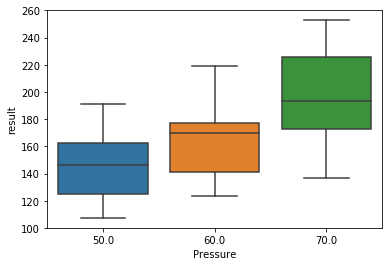

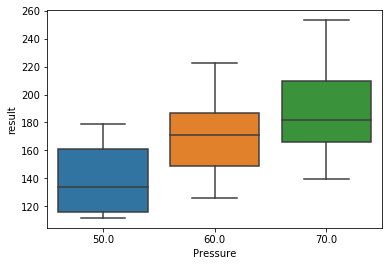

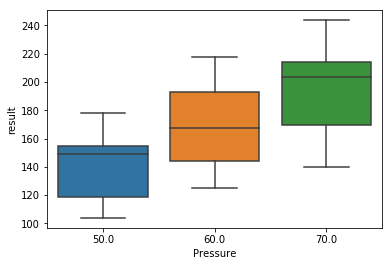

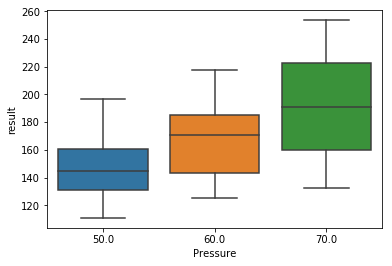

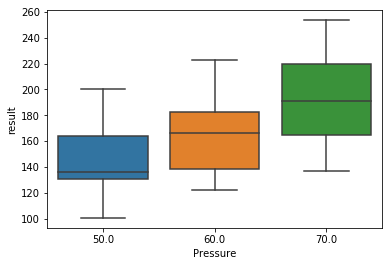

In [99]:
plot_result(variable='Pressure')

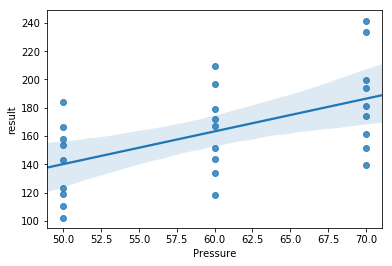

In [101]:
sns.regplot(x='Pressure',y='result',data=df)
plt.show()